# Sales Performance Analysis (Python)

## Objective
This project focuses on cleaning, preparing, and analyzing sales data using Python.
The cleaned dataset will later be used for BI visualization tools such as Power BI.

## Tools Used
- Python
- Pandas
- Matplotlib

## Key Focus
- Data cleaning & standardization
- Feature engineering
- Exploratory data analysis (EDA)
- Business-ready insights

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_excel('03_Financial Sample-2014.xlsx')

In [19]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,NaN,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              525 non-null    object        
 1   Country              525 non-null    object        
 2   Product              525 non-null    object        
 3   Discount Band        480 non-null    object        
 4   Units Sold           525 non-null    float64       
 5   Manufacturing Price  525 non-null    int64         
 6   Sale Price           525 non-null    int64         
 7   Gross Sales          525 non-null    float64       
 8   Discounts            525 non-null    float64       
 9    Sales               525 non-null    float64       
 10  COGS                 525 non-null    float64       
 11  Profit               525 non-null    float64       
 12  Date                 525 non-null    datetime64[ns]
 13  Month Number         525 non-null  

In [21]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [22]:
df.columns = (
    df.columns
      .str.strip()            # buang space
      .str.lower()            # lowercase
      .str.replace(' ', '_')  # space → underscore
      .str.replace('%', 'pct')
      .str.replace('/', '_')
)

In [23]:
df.columns

Index(['segment', 'country', 'product', 'discount_band', 'units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name',
       'year'],
      dtype='object')

## Data Cleaning

The following steps were applied:
- Standardized column names
- Checked for missing values
- Ensured correct data types

In [24]:
df.isna().sum()

,0
segment,0
country,0
product,0
discount_band,45
units_sold,0
manufacturing_price,0
sale_price,0
gross_sales,0
discounts,0
sales,0


In [25]:
df = df.dropna()

In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
df[['sales', 'profit']].describe()

,sales,profit
count,4.800000e+02,480.000000
mean,1.789161e+05,24241.720313
std,2.428772e+05,42323.910349
min,1.655080e+03,-38046.250000
25%,1.650857e+04,2666.145000
50%,3.767820e+04,9241.800000
75%,2.743685e+05,24038.250000
max,1.159200e+06,262200.000000


## Feature Engineering

New metrics were created to support business analysis:
- Profit Margin
- Month

In [28]:
df['profit_margin'] = df['profit'] / df['sales']
df['month'] = df['date'].dt.month

## Exploratory Data Analysis (EDA)

The analysis below explores sales and profit trends over time.

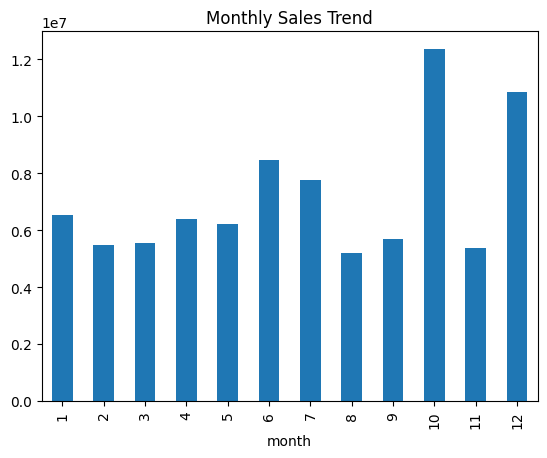

In [29]:
monthly_sales = df.groupby('month')['sales'].sum()

monthly_sales.plot(kind='bar', title='Monthly Sales Trend')
plt.show()

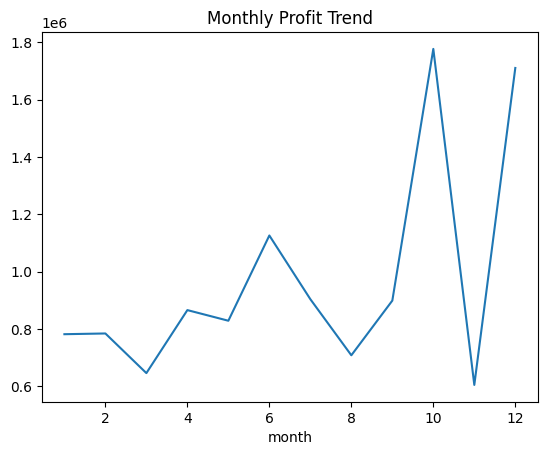

In [30]:
monthly_profit = df.groupby('month')['profit'].sum()

monthly_profit.plot(kind='line', title='Monthly Profit Trend')
plt.show()

## Key Insights

- Sales peaked towards the end of the year, indicating strong Q4 performance.
- Profit showed fluctuations but remained positive across most months.
- Profit margin varied, suggesting opportunities for cost optimization.

In [31]:
df_clean = df.copy()
df_clean.to_csv('financial_sample_2014_clean.csv', index=False)